Time Series Analysis

In [ ]:
import pandas as pd
data=pd.read_csv('/content/train.csv')
data.head()

,Date,store,product,Sales
0,1/1/2010,0,0,801
1,1/2/2010,0,0,810
2,1/3/2010,0,0,818
3,1/4/2010,0,0,796
4,1/5/2010,0,0,808


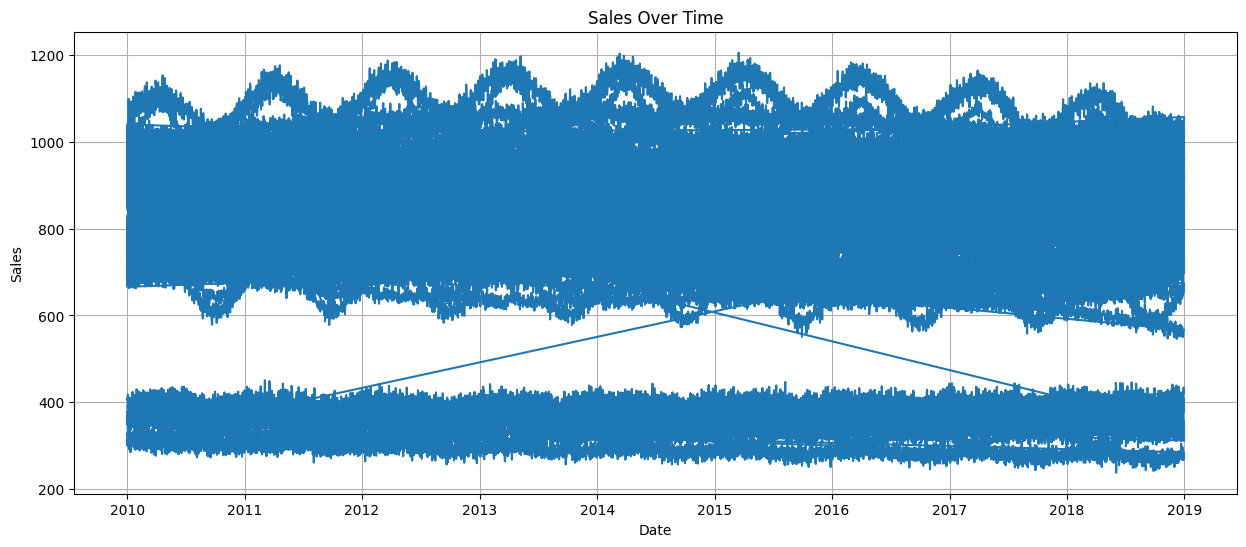

In [ ]:
#VISUALIZING

import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data = data.set_index('Date')
plt.figure(figsize=(15, 6))
plt.plot(data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


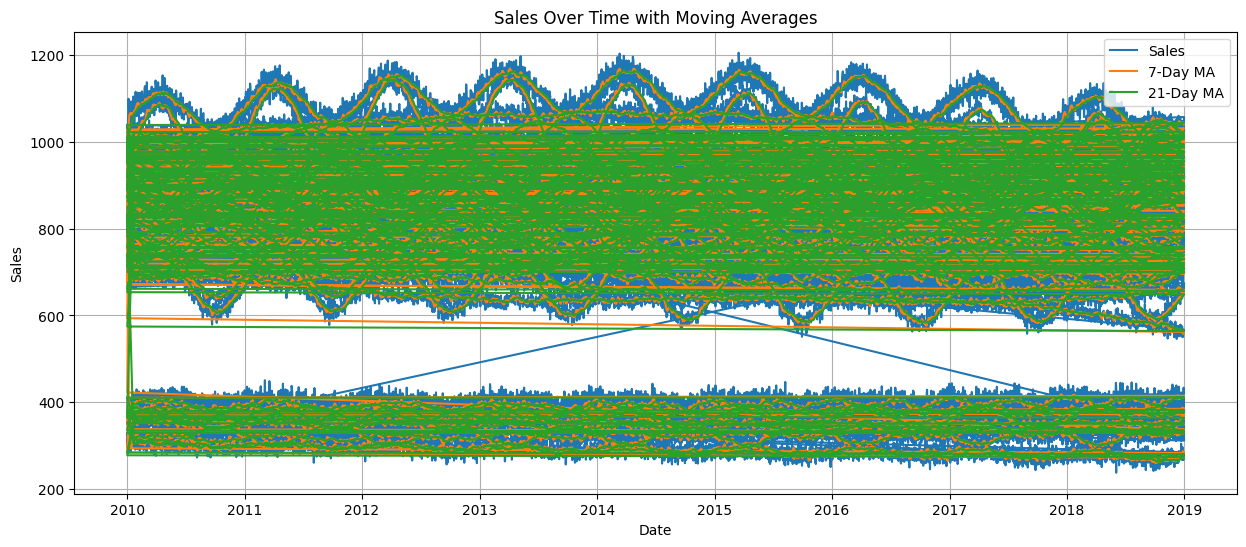

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate moving averages
data['MA7'] = data['Sales'].rolling(window=7).mean()
data['MA21'] = data['Sales'].rolling(window=21).mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(data['Sales'], label='Sales')
plt.plot(data['MA7'], label='7-Day MA')
plt.plot(data['MA21'], label='21-Day MA')
plt.title('Sales Over Time with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


RMSE: 131.91342923318965
MAPE: 0.1829981662577124


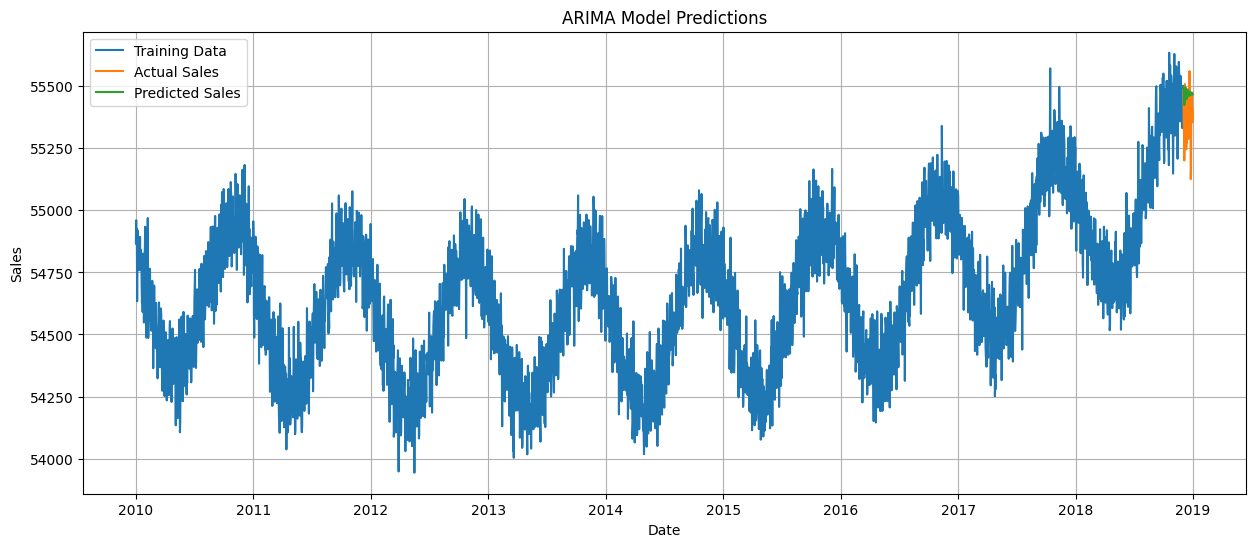

Sales Forecast:
2019-01-01    55458.319767
2019-01-02    55452.604700
2019-01-03    55432.736754
2019-01-04    55381.527812
2019-01-05    55392.272503
2019-01-06    55438.816651
2019-01-07    55446.432604
2019-01-08    55452.052335
2019-01-09    55438.395446
2019-01-10    55410.516245
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
!pip install statsmodels --upgrade
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('/content/train.csv')

data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

data = data.resample('D').sum()

data = data.sort_index()

train_data = data[:-30]
test_data = data[-30:]

# Fit the ARIMA model
model = ARIMA(train_data['Sales'], order=(5, 1, 0))
model_fit = model.fit()

predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
predictions = predictions.add(train_data['Sales'].iloc[-1] - predictions.iloc[0], fill_value=0)


rmse = np.sqrt(mean_squared_error(test_data['Sales'], predictions))
print(f'RMSE: {rmse}')

# MAPE Calculation
mape = np.mean(np.abs((test_data['Sales'] - predictions) / test_data['Sales'])) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data['Sales'], label='Training Data')
plt.plot(test_data['Sales'], label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Generate forecasts
forecast = model_fit.get_forecast(steps=10)
forecast_values = forecast.predicted_mean
forecast_index = pd.date_range(start=test_data.index[-1] + pd.DateOffset(days=1), periods=10, freq='D')
forecast_values.index = forecast_index

print("Sales Forecast:")
print(forecast_values)

Predicting Heart Disease Using
Logistic Regression

In [ ]:
import pandas as pd
data=pd.read_csv('/content/heart_disease.csv')
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,target
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,0
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,0
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,0
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,0
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,0


In [64]:
import pandas as pd
data=pd.read_csv('/content/heart_disease.csv')

from sklearn.preprocessing import LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
print(data.head())


    Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0       1           153.0              155.0                0        1   
1  69.0       0           146.0              286.0                0        0   
2  46.0       1           126.0              216.0                1        0   
3  32.0       0           122.0              293.0                0        1   
4  60.0       1           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                     1         0  24.991591                    1  ...   
1                     1         1  25.221799                    0  ...   
2                     0         0  29.855447                    0  ...   
3                     1         0  24.130477                    1  ...   
4                     1         1  20.486289                    1  ...   

   High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.553
              precision    recall  f1-score   support

           0       0.29      0.00      0.00       891
           1       0.55      1.00      0.71      1109

    accuracy                           0.55      2000
   macro avg       0.42      0.50      0.36      2000
weighted avg       0.43      0.55      0.40      2000

Accuracy: 0.553


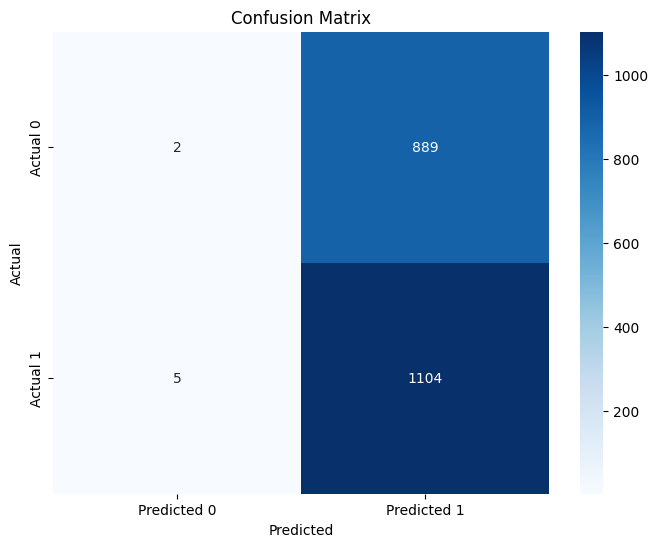

              precision    recall  f1-score   support

           0       0.29      0.00      0.00       891
           1       0.55      1.00      0.71      1109

    accuracy                           0.55      2000
   macro avg       0.42      0.50      0.36      2000
weighted avg       0.43      0.55      0.40      2000



In [69]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer



X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))
